In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [10]:
df = pd.read_csv('ushape.csv')

In [11]:
df = df.rename(columns={
    '3.159499363321345566e-02': 'x',
    '9.869877579082642072e-01': 'y',
    '0.000000000000000000e+00': 'class'
})
df.head()

,x,y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


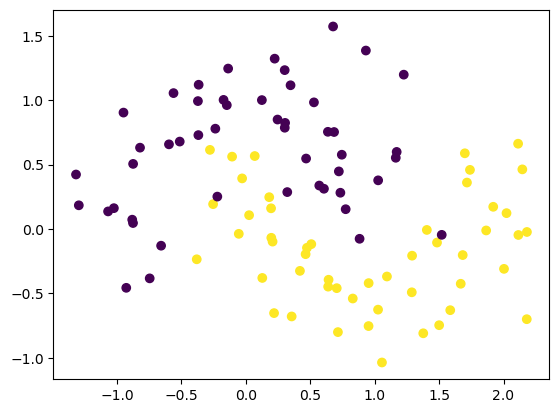

In [12]:
plt.scatter(df['x'],df['y'],c=df['class'])

In [13]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [14]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

x:\Users\ASUS\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 10)             │            30 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 371 (1.45 KB)

 Trainable params: 371 (1.45 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.get_weights()

[array([[ 0.86827654,  0.9333871 ,  0.45892498,  0.5574268 , -0.04800641,
          0.05524531, -1.1323421 ,  0.40643498,  0.29549825, -0.21138121],
        [ 0.58104557,  1.8623394 ,  0.3280445 , -0.0997011 ,  2.2097747 ,
          0.31451678,  1.1145699 ,  0.07814157,  0.7531786 , -0.8685504 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.09217713, -0.27638048,  0.02381867,  0.52441853, -0.34699762,
         -0.61161524, -0.2343867 , -0.13754253,  0.46421382,  0.2519579 ],
        [ 0.5477175 , -0.66969514,  0.6985022 ,  0.08961673, -0.08642489,
         -0.06359128, -0.02621165, -0.09139799, -0.43633965,  0.04184718],
        [ 0.8685493 , -0.37796023,  0.05478344, -0.6009454 ,  0.5074283 ,
          0.2681275 ,  0.04410776, -0.7134281 ,  0.6927032 , -0.07689549],
        [ 0.74291265,  0.4689044 ,  0.22303344, -0.38016137, -0.25634512,
          0.7144688 , -0.04338343,  0.39476603, -0.15475398, -0.30827305],
        [ 0.46877

In [16]:
initial_weights = model.get_weights()

In [17]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [18]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 135ms/step - accuracy: 0.7075 - loss: 0.5760 - val_accuracy: 0.8500 - val_loss: 0.5014
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7328 - loss: 0.5442 - val_accuracy: 0.8500 - val_loss: 0.4961
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7908 - loss: 0.5456 - val_accuracy: 0.8500 - val_loss: 0.4919
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.7596 - loss: 0.5557 - val_accuracy: 0.8500 - val_loss: 0.4880
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8137 - loss: 0.5357 - val_accuracy: 0.9000 - val_loss: 0.4840
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.8255 - loss: 0.5187 - val_accuracy: 0.9000 - val_loss: 0.4805
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8411 - loss: 0.5304 - val_accuracy: 0.9000 - val_loss: 0.4770
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.8044 - loss: 0.5457 - val_accuracy: 0.9000 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 8s 860us/step


<Axes: >

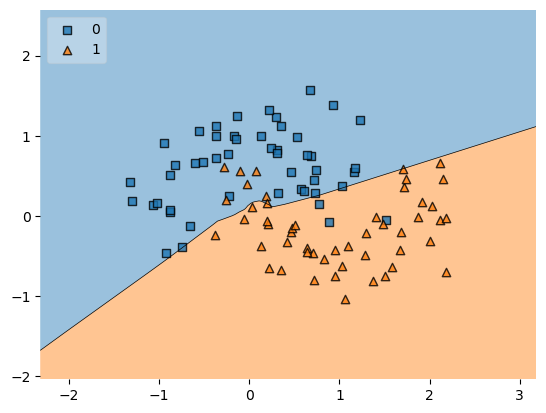

In [19]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)